In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
import numpy as np
from utils import *
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [3]:
### RUN EXP
ns = 5
schargs = {
  'concentration':2.05,
  'stickiness':1.01,
  'sparsity':0.05
}

dataL = []
for i in range(ns):
  task = Task()
  sem = SEM(schargs)
  exp,curr  = task.generate_experiment('blocked',160,4)
  data = sem.run_exp(exp)
  data['exp']=exp
  dataL.append(data)

In [4]:
### inspect predictions
xth=data['xth']
l=2
ns=(5,6)
ysm = softmax(xth[:,l,ns],1)
yh = xth[:,l,ns]
ysm = softmax(yh,-1)
for y,ys,e in zip(yh,ysm,exp):
  print(y,ys,e[:l+1])
exp.shape

[0.506 0.506] [0.5 0.5] [0 1 3]
[1.606      0.93933333] [0.66075637 0.33924363] [0 1 3]
[1.506 1.506] [0.5 0.5] [0 1 4]
[1.33866667 8.012     ] [0.00126258 0.99873742] [0 1 4]
[3.946 2.346] [0.83201839 0.16798161] [0 1 3]
[5.32028571 2.74885714] [0.92899998 0.07100002] [0 1 3]
[ 2.1452 15.7532] [1.23060920e-06 9.99998769e-01] [0 1 4]
[7.206      3.65044444] [0.97222783 0.02777217] [0 1 3]
[ 2.53371429 22.25657143] [2.71939299e-09 9.99999997e-01] [0 1 4]
[9.09690909 4.55145455] [0.98949616 0.01050384] [0 1 3]
[10.49061538  4.95215385] [0.99608283 0.00391717] [0 1 3]
[11.886       5.35266667] [0.99854796 0.00145204] [0 1 3]
[ 3.74955556 31.314     ] [1.06884291e-12 1.00000000e+00] [0 1 4]
[ 3.73236364 36.46872727] [6.06426143e-15 1.00000000e+00] [0 1 4]
[14.28247059  6.75305882] [9.99463234e-01 5.36765806e-04] [0 1 3]
[ 4.12815385 42.90661538] [1.44121289e-17 1.00000000e+00] [0 1 4]
[16.17968421  7.65336842] [9.99801855e-01 1.98144508e-04] [0 1 3]
[ 4.52506667 49.3344    ] [3.46380788e-2

(164, 6)

In [5]:
def get_sm(xth):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [trial,layer2/3,node56/78]
  """
  nodes = {2:(5,6),3:(7,8)} 
  L = [] # layer 2 and 3
  for l,ns in nodes.items():
    y = softmax(xth[:,l,ns],-1)
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)

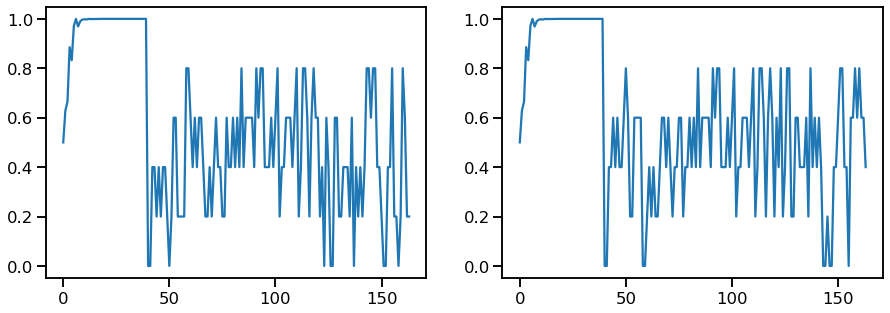

In [6]:
### accuracy for layer 2 and layer 3
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
f,ax = plt.subplots(1,2,figsize=(15,5))
for i in range(2):
  M = acc[:,i].mean(0)
  ax[i].plot(M)


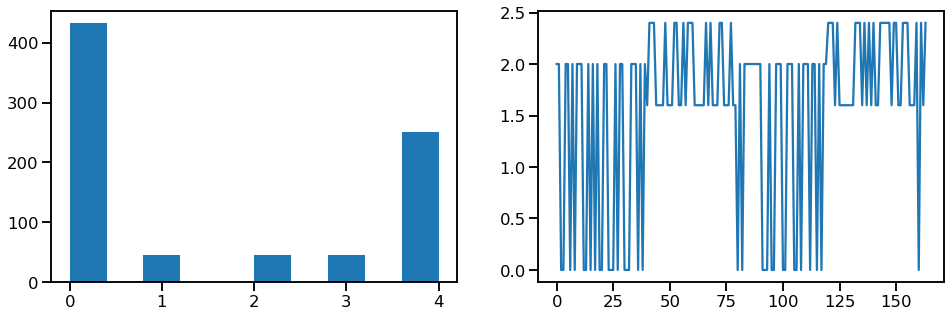

In [14]:
### schema usage
f,ax = plt.subplots(1,2,figsize=(16,5))
zt = data['zt'][:,:-1].flatten()
ax[0].hist(zt)
ax[1].plot(data['zt'][:,:-1].mean(1))

In [15]:
### schema usage
[np.unique(d['zt']) for d in dataL] 

[array([-1.,  0.,  1.,  2.,  3.,  4.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.])]

In [10]:
for p in data['priors']:
  print(p)

[2.05, 2.05]
[1.0, 1.0, 1.0, 1.0, 2.01, 2.05]
[2.0, 2.0, 2.0, 2.0, 3.01, 2.05]
[8.01, 2.0, 2.0, 2.0, 2.0, 2.05]
[13.01, 2.0, 2.0, 2.0, 2.0, 2.05]
[13.0, 3.0, 3.0, 3.0, 4.01, 2.05]
[14.0, 4.0, 4.0, 4.0, 5.01, 2.05]
[20.01, 4.0, 4.0, 4.0, 4.0, 2.05]
[20.0, 5.0, 5.0, 5.0, 6.01, 2.05]
[26.01, 5.0, 5.0, 5.0, 5.0, 2.05]
[26.0, 6.0, 6.0, 6.0, 7.01, 2.05]
[27.0, 7.0, 7.0, 7.0, 8.01, 2.05]
[28.0, 8.0, 8.0, 8.0, 9.01, 2.05]
[34.01, 8.0, 8.0, 8.0, 8.0, 2.05]
[39.01, 8.0, 8.0, 8.0, 8.0, 2.05]
[39.0, 9.0, 9.0, 9.0, 10.01, 2.05]
[45.01, 9.0, 9.0, 9.0, 9.0, 2.05]
[45.0, 10.0, 10.0, 10.0, 11.01, 2.05]
[51.01, 10.0, 10.0, 10.0, 10.0, 2.05]
[51.0, 11.0, 11.0, 11.0, 12.01, 2.05]
[57.01, 11.0, 11.0, 11.0, 11.0, 2.05]
[62.01, 11.0, 11.0, 11.0, 11.0, 2.05]
[62.0, 12.0, 12.0, 12.0, 13.01, 2.05]
[63.0, 13.0, 13.0, 13.0, 14.01, 2.05]
[69.01, 13.0, 13.0, 13.0, 13.0, 2.05]
[74.01, 13.0, 13.0, 13.0, 13.0, 2.05]
[79.01, 13.0, 13.0, 13.0, 13.0, 2.05]
[79.0, 14.0, 14.0, 14.0, 15.01, 2.05]
[85.01, 14.0, 14.0, 14.0, 1

In [11]:
for like in data['likesL2']:
  print(like)

[0.1, 0.1]
[0.1, 0.1, 0.7000000000000001, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.7000000000000001, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.82, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.8714285714285713, 0.1, 0.1, 0.1]
[0.82, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.8999999999999999, 0.1, 0.1, 0.1]
[0.8714285714285713, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9181818181818181, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9307692307692308, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.94, 0.1, 0.1, 0.1]
[0.8999999999999999, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.9181818181818181, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9470588235294118, 0.1, 0.1, 0.1]
[0.9307692307692308, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9526315789473685, 0.1, 0.1, 0.1]
[0.94, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9571428571428572, 0.1, 0.1, 0.1]
[0.9470588235294118, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.9526315789473685, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9608695652173914, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.9640000000000001, 0.1, 0.1, 0.1]
[0.9571428571428572, 0.1, 0.1, 0.1, 0.1, 0.1]
[0

In [12]:
for i,po in enumerate(data['postL2']):
  print(i,po)

0 [[0.205, 0.205]]
1 [[0.1, 0.1, 0.7000000000000001, 0.1, 0.20099999999999998, 0.205]]
2 [[0.2, 0.2, 0.2, 0.2, 0.301, 0.205]]
3 [[5.607, 0.2, 0.2, 0.2, 0.2, 0.205]]
4 [[1.3010000000000002, 0.2, 1.64, 0.2, 0.2, 0.205]]
5 [[1.3, 0.30000000000000004, 2.614285714285714, 0.30000000000000004, 0.401, 0.205]]
6 [[11.479999999999999, 0.4, 0.4, 0.4, 0.501, 0.205]]
7 [[2.0010000000000003, 0.4, 3.5999999999999996, 0.4, 0.4, 0.205]]
8 [[17.428571428571427, 0.5, 0.5, 0.5, 0.601, 0.205]]
9 [[2.6010000000000004, 0.5, 4.590909090909091, 0.5, 0.5, 0.205]]
10 [[2.6, 0.6000000000000001, 5.584615384615384, 0.6000000000000001, 0.7010000000000001, 0.205]]
11 [[2.7, 0.7000000000000001, 6.58, 0.7000000000000001, 0.801, 0.205]]
12 [[25.199999999999996, 0.8, 0.8, 0.8, 0.901, 0.205]]
13 [[31.22736363636363, 0.8, 0.8, 0.8, 0.8, 0.205]]
14 [[3.901, 0.8, 7.576470588235295, 0.8, 0.8, 0.205]]
15 [[36.300000000000004, 0.9, 0.9, 0.9, 1.0010000000000001, 0.205]]
16 [[4.501, 0.9, 8.573684210526316, 0.9, 0.9, 0.205]]
17 [[